In [1]:
# Remove Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# General
import numpy as np

# Data Management
import pandas as pd

# Reporting
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('data/ETH_USDT-1h_processed.csv')
# print(df.shape)
# print(df.columns)

# df = df[1000:1020]
# df = df[['timestamp', 'close']]

df = pd.read_json('../data/ETH_USDT-5m.json')
df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
# convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
# set timestamp as index
df.set_index('timestamp', inplace=True)
df = df[:1500]
df.head()

## Only up
# df['close'] = [i for i in range(100, 120)]

# ## Only down
# df['close'] = [i for i in reversed([i for i in range(100, 120)])]


df.head()

,open,high,low,close,volume
timestamp,,,,,
2017-08-17 04:00:00,301.13,301.13,300.00,301.13,3.82951
2017-08-17 04:05:00,300.00,301.13,298.00,298.00,1.97216
2017-08-17 04:10:00,298.00,298.00,298.00,298.00,0.00000
2017-08-17 04:15:00,298.00,299.05,298.00,299.05,12.88486
2017-08-17 04:20:00,299.05,300.10,299.05,300.10,6.58304


In [3]:
df['returns'] =  df['close'].pct_change()
df['cumulative_returns'] = (1 + df['returns']).cumprod() - 1

df.dropna(inplace=True)
df.head(30)

,open,high,low,close,volume,returns,cumulative_returns
timestamp,,,,,,,
2017-08-17 04:05:00,300.00,301.13,298.00,298.00,1.97216,-0.010394,-1.039418e-02
2017-08-17 04:10:00,298.00,298.00,298.00,298.00,0.00000,0.000000,-1.039418e-02
2017-08-17 04:15:00,298.00,299.05,298.00,299.05,12.88486,0.003523,-6.907316e-03
2017-08-17 04:20:00,299.05,300.10,299.05,300.10,6.58304,0.003511,-3.420450e-03
2017-08-17 04:25:00,299.40,300.80,299.39,299.39,11.97275,-0.002366,-5.778235e-03
2017-08-17 04:30:00,299.39,299.39,299.39,299.39,20.79097,0.000000,-5.778235e-03
2017-08-17 04:35:00,299.39,300.79,299.39,299.60,27.59262,0.000701,-5.080862e-03
2017-08-17 04:40:00,299.60,299.60,299.60,299.60,4.55220,0.000000,-5.080862e-03
2017-08-17 04:45:00,299.60,300.80,299.60,300.79,5.23649,0.003972,-1.129080e-03


<AxesSubplot: xlabel='timestamp'>

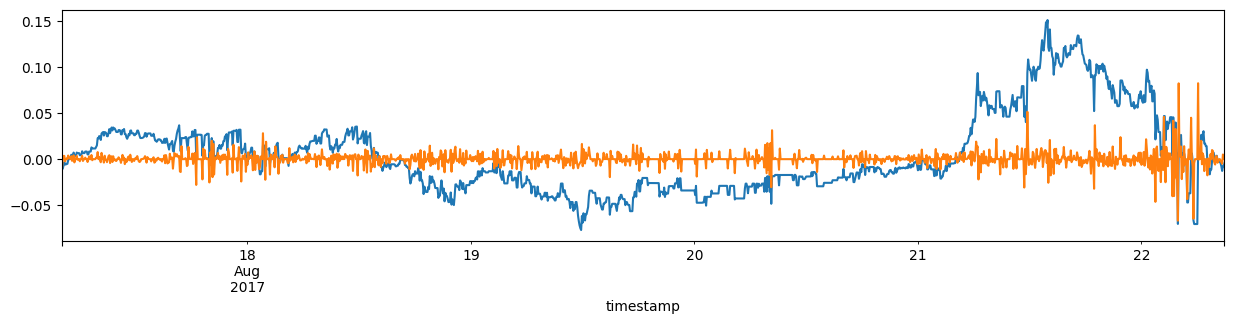

In [4]:
fig = plt.figure(figsize = (15, 3))

df['cumulative_returns'].plot()
df['returns'].plot()

<AxesSubplot: xlabel='timestamp'>

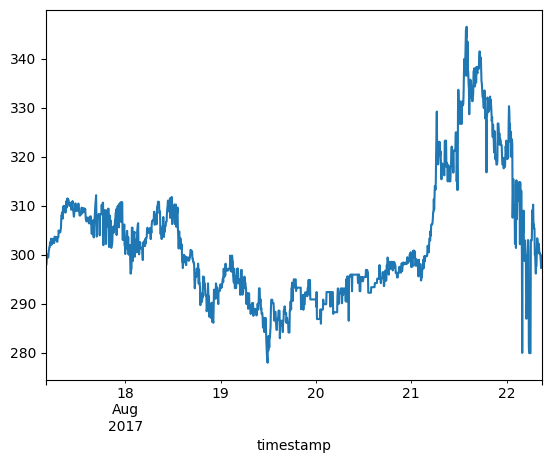

In [5]:
df['close'].plot()

In [6]:
df['action'] = 0
df

,open,high,low,close,volume,returns,cumulative_returns,action
timestamp,,,,,,,,
2017-08-17 04:05:00,300.00,301.13,298.00,298.00,1.97216,-0.010394,-0.010394,0
2017-08-17 04:10:00,298.00,298.00,298.00,298.00,0.00000,0.000000,-0.010394,0
2017-08-17 04:15:00,298.00,299.05,298.00,299.05,12.88486,0.003523,-0.006907,0
2017-08-17 04:20:00,299.05,300.10,299.05,300.10,6.58304,0.003511,-0.003420,0
2017-08-17 04:25:00,299.40,300.80,299.39,299.39,11.97275,-0.002366,-0.005778,0
...,...,...,...,...,...,...,...,...
2017-08-22 08:35:00,299.82,299.82,297.77,298.80,42.28360,-0.003402,-0.007738,0
2017-08-22 08:40:00,298.80,298.80,297.30,297.30,20.30907,-0.005020,-0.012719,0
2017-08-22 08:45:00,297.30,298.80,297.30,298.80,16.18391,0.005045,-0.007738,0


In [7]:
# tp = 0.01
# sl = -0.01

# for i in range(len(df['action'])):
#     th_up_lst = []
#     th_down_lst = []
#     th_zigzag_up_lst = []
#     th_zigzag_down_lst = []
    
#     threshould_up = threshould_down = 0
#     threshould_zigzag_up = threshould_zigzag_down = 0
#     for j in range(i, len(df['cumulative_returns'])):
#         ## Case 3: zig-zag up
#         if df['returns'].iloc[j] > 0:
#             threshould_zigzag_up = threshould_zigzag_up + df['returns'].iloc[j]
#             th_zigzag_up_lst.append(threshould_zigzag_up)
#             if threshould_zigzag_up > tp:
#                 df['action'].iloc[i] = 3
#                 break
        
#         ## Case 1: Straight up
#         if df['cumulative_returns'].iloc[j] > df['cumulative_returns'].iloc[j-1]:
#             if df['returns'].iloc[j] > 0:
#                 threshould_up = threshould_up + df['returns'].iloc[j]
#                 th_up_lst.append(threshould_up)
#                 if threshould_up > tp:
#                     df['action'].iloc[i] = 1
#                     break
        
#         ## Case 3: zig-zag down
#         if df['returns'].iloc[j] < 0:
#             threshould_zigzag_down = threshould_zigzag_down + df['returns'].iloc[j]
#             th_zigzag_down_lst.append(threshould_zigzag_down)
#             if threshould_zigzag_down < sl:
#                 df['action'].iloc[i] = 4
#                 break
        
#         ## Case 2: Straight down
#         if df['cumulative_returns'].iloc[j] < df['cumulative_returns'].iloc[j-1]:
#             if df['returns'].iloc[j] < 0:
#                 threshould_down = threshould_down + df['returns'].iloc[j]
#                 th_down_lst.append(threshould_down)
#                 if threshould_down < sl:
#                     df['action'].iloc[i] = 2
#                     break
        

In [8]:
# tp = 0.03
# sl = -0.01
# hypothtical_value = 1e-20


# for i in range(len(df['action'])):
#     threshould_lst = [1e-20, 1e-21]
#     threshould = 0
#     always_down = True
#     for j in range(i, len(df['cumulative_returns'])):
#         ## Calculate threshould
#         threshould = threshould + df['returns'].iloc[j]
        
#         always_up = True if (threshould > threshould_lst[-1] and threshould_lst[-1] > threshould_lst[-2]) else False
#         always_down = True if (threshould < threshould_lst[-1]) else False

#         if threshould >= tp:
#             df['action'].iloc[i] = 1
#             break
        
#         if threshould <= sl:
#             df['action'].iloc[i] = 2
#             break

#         threshould_lst.append(threshould)

def double_barrier(data, tp, sl):    
    d = pd.DataFrame(data, columns=['price'])
    d['returns'] =  d['price'].pct_change()
    d['cumulative_returns'] = (1 + d['returns']).cumprod() - 1
    d['action'] = np.nan

    for i in range(len(df['action'])):
        threshould = 0
        for j in range(i, len(d['cumulative_returns'])):
            ## Calculate threshould
            threshould = threshould + d['returns'].iloc[j]
#             d['action'].iloc[i] = 0
            
            if threshould >= tp:
                d['action'].iloc[i] = 1
                break

            if threshould <= sl:
                d['action'].iloc[i] = 2
                break

    return np.array(d['action'].shift())


df['action'] =  double_barrier(np.array(df['close']), 0.03, -0.01)

<AxesSubplot: xlabel='timestamp'>

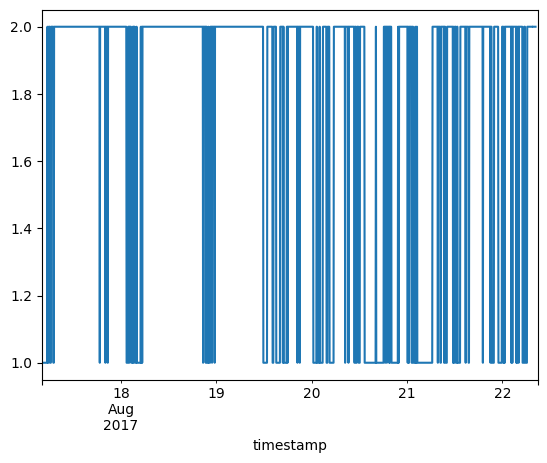

In [9]:
df['action'].plot()

In [10]:
df['action_shift'] = df['action'].shift() 

In [11]:
df.tail(30)

,open,high,low,close,volume,returns,cumulative_returns,action,action_shift
timestamp,,,,,,,,,
2017-08-22 06:30:00,309.04,309.04,307.33,307.33,11.29692,-0.005533,0.020589,2.0,2.0
2017-08-22 06:35:00,307.33,309.24,307.33,309.24,15.70702,0.006215,0.026932,2.0,2.0
2017-08-22 06:40:00,309.24,310.24,308.90,310.24,21.05174,0.003234,0.030253,2.0,2.0
2017-08-22 06:45:00,308.43,308.43,306.22,306.22,57.17374,-0.012958,0.016903,2.0,2.0
2017-08-22 06:50:00,306.22,306.22,305.22,306.22,17.76872,0.000000,0.016903,2.0,2.0
2017-08-22 06:55:00,306.22,306.22,305.37,305.37,12.72105,-0.002776,0.014080,2.0,2.0
2017-08-22 07:00:00,305.37,305.37,305.37,305.37,5.38981,0.000000,0.014080,2.0,2.0
2017-08-22 07:05:00,302.08,302.08,299.25,300.02,47.67981,-0.017520,-0.003686,2.0,2.0
2017-08-22 07:10:00,300.24,300.24,300.02,300.23,13.94976,0.000700,-0.002989,2.0,2.0


In [12]:
straight_up = [index-1 if value ==1 else None for index, value in enumerate(df['action'])]
straight_up = [value for value in straight_up if value is not None]

# zigzag_up = [index if value ==3 else None for index, value in enumerate(df['action'])]
# zigzag_up = [value for value in zigzag_up if value is not None]

straight_down = [index-1 if value ==2 else None for index, value in enumerate(df['action'])]
straight_down = [value for value in straight_down if value is not None]

# zigzag_down = [index if value ==4 else None for index, value in enumerate(df['action'])]
# zigzag_down = [value for value in zigzag_down if value is not None]

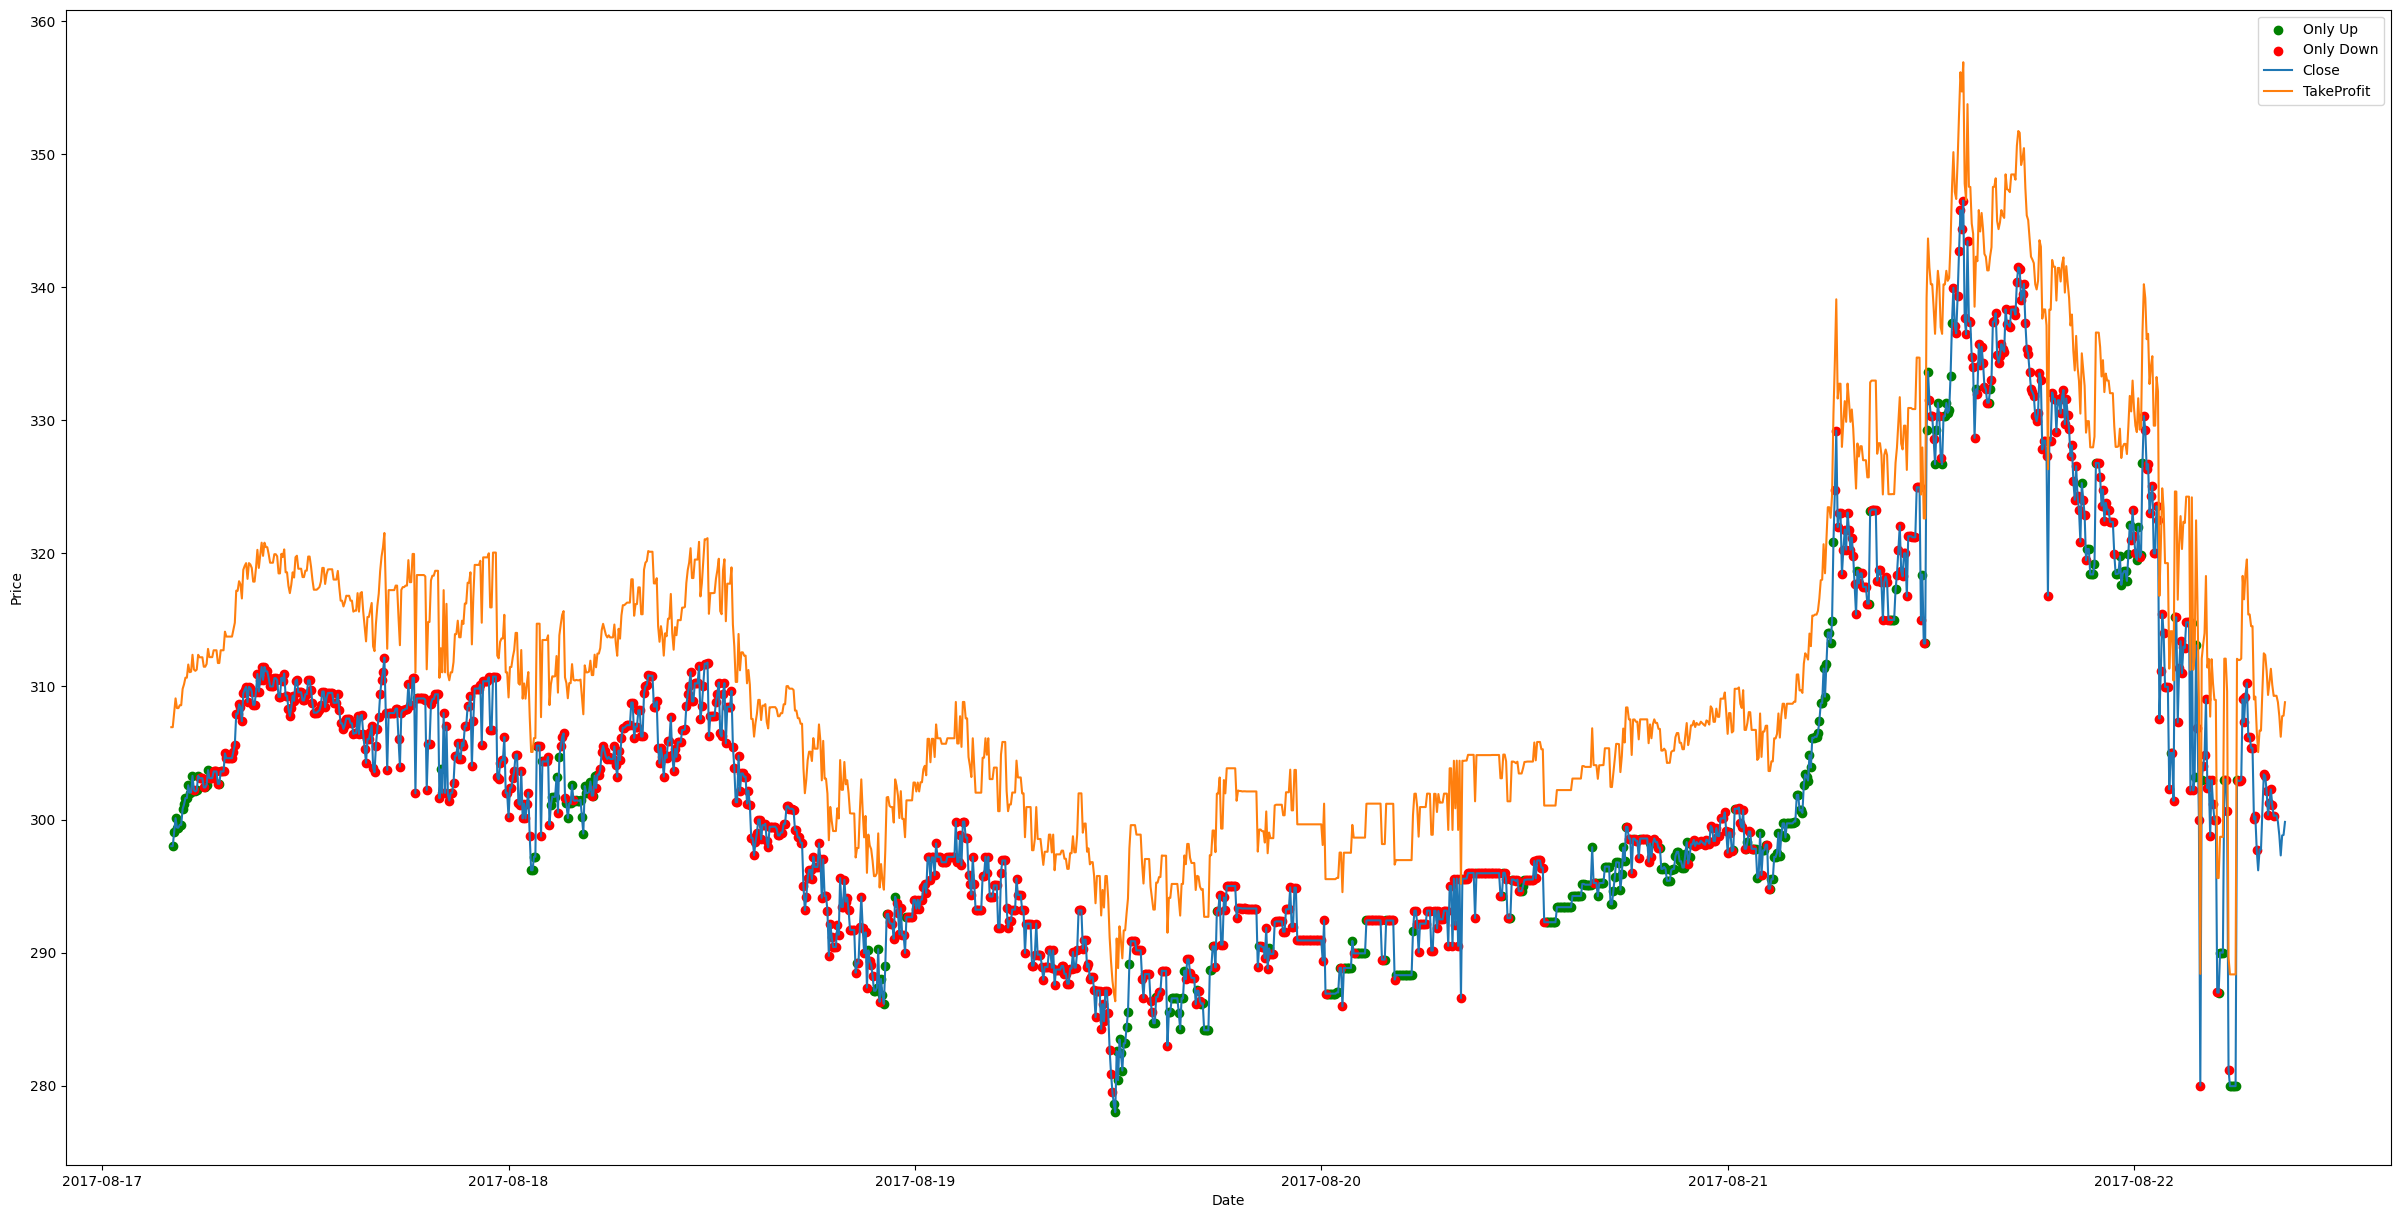

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df['tp_close'] = df['close'] + (df['close']*0.03) 
df['sl_close'] = df['close'] + (df['close']*-0.01) 


# dates = df.index
# prices = df['close']
only_up = straight_up
# zigzag_up = zigzag_up

only_down = straight_down
# zigzag_down = zigzag_down

# dff = pd.DataFrame({'price': prices}, index=dates)

# create scatter plot of buy and sell events
df['only_up'] = df.index.isin(df.index[only_up])
# df['zigzag_up'] = df.index.isin(df.index[zigzag_up])
df['only_down'] = df.index.isin(df.index[only_down])
# df['zigzag_down'] = df.index.isin(df.index[zigzag_down])


fig, ax = plt.subplots(figsize=(30, 15))

plt.scatter(df.index[df['only_up']], df['close'][df['only_up']], color='green', label='Only Up')
# plt.scatter(df.index[df['zigzag_up']], df['close'][df['zigzag_up']], color='yellow', label='Zigzag Up')

plt.scatter(df.index[df['only_down']], df['close'][df['only_down']], color='red', label='Only Down')
# plt.scatter(df.index[df['zigzag_down']], df['close'][df['zigzag_down']], color='pink', label='Zigzag Down')

# create line plot of price
plt.plot(df.index, df['close'], label='Close')
plt.plot(df.index, df['tp_close'], label='TakeProfit')
# plt.plot(df.index, df['sl_close'], label='StopLoss')


# set axis labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# show the plot
plt.show()


In [13]:
df

,open,high,low,close,volume,returns,cumulative_returns,action,tp_close,sl_close,only_up,only_down
timestamp,,,,,,,,,,,,
2017-08-20 15:25:00,295.16,295.16,295.16,295.16,0.00620,0.003093,0.003093,1,298.1116,292.2084,True,False
2017-08-20 15:30:00,295.16,295.16,295.16,295.16,0.00000,0.000000,0.003093,1,298.1116,292.2084,True,False
2017-08-20 15:35:00,295.10,295.10,295.10,295.10,0.00959,-0.000203,0.002889,1,298.0510,292.1490,True,False
2017-08-20 15:40:00,295.10,295.10,295.10,295.10,0.00000,0.000000,0.002889,1,298.0510,292.1490,True,False
2017-08-20 15:45:00,295.10,295.10,295.10,295.10,0.00000,0.000000,0.002889,1,298.0510,292.1490,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-21 07:35:00,316.63,316.63,314.12,315.41,15.61334,-0.007114,0.071912,0,318.5641,312.2559,False,False
2017-08-21 07:40:00,314.26,318.71,314.26,318.70,8.17841,0.010431,0.083093,0,321.8870,315.5130,False,False
2017-08-21 07:45:00,317.75,318.70,313.00,317.75,37.66899,-0.002981,0.079864,0,320.9275,314.5725,False,False
